In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re
from tensorflow import keras
import keras
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics, preprocessing
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization
from sklearn.utils import shuffle

In [121]:
data = pd.read_csv('combined.csv', sep='\t')
test_data = pd.read_csv('combined_test.csv', sep='\t')

In [11]:
data.head()

,peak_1,peak_2,peak_3,peak_4,peak_5,peak_6,codes
0,5.556681,4.091404,4.501916,4.209752,2.451787,2.150988,1
1,5.212766,3.115224,5.286706,4.546477,2.419685,3.152779,7
2,5.260573,3.143794,5.881500,3.262469,2.093593,4.084726,7
3,4.337921,3.756750,1.603347,2.007628,2.470347,2.144694,3
4,5.541429,4.829944,4.322524,4.729935,2.327353,3.283109,8


In [12]:
X = data[['peak_1', 'peak_2', 'peak_3', 'peak_4', 'peak_5', 'peak_6']]
y = data["codes"]

In [13]:
# split data to train and test arrays
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [14]:
# transform numbers into tensor
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

In [15]:
# take out some training data for the validation process
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [104]:
#create the model 
model_dropout = models.Sequential()
model_dropout.add(layers.Dense(512, activation='relu', input_dim=6))
model.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(512, activation='relu'))
model_dropout.add(layers.Dense(512, activation='relu'))
model_dropout.add(layers.Dense(128, activation='relu'))
model_dropout.add(layers.Dense(10, activation='softmax'))

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
# little modification to test accuracy and ovefitting
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=6))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
model_small = models.Sequential()
model_small.add(layers.Dense(512, activation='relu', input_dim=6))
model_small.add(layers.Dense(512, activation='relu'))
model_small.add(layers.Dense(512, activation='relu'))
model_small.add(layers.Dense(512, activation='relu'))
model_small.add(layers.Dense(10, activation='softmax'))

model_small.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
# training the model with training data and using validation to help it learn
history_small = model_small.fit(partial_X_train, partial_y_train, epochs=500, batch_size=500, validation_data=(X_val, y_val))

Epoch 1/500
29/29 [==============================] - 1s 29ms/step - loss: 0.9296 - accuracy: 0.6785 - val_loss: 0.9439 - val_accuracy: 0.6744
Epoch 497/500
29/29 [==============================] - 1s 29ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.3348 - val_accuracy: 0.9471
Epoch 498/500
29/29 [==============================] - 1s 30ms/step - loss: 0.0174 - accuracy: 0.9969 - val_loss: 0.3241 - val_accuracy: 0.9485
Epoch 499/500
29/29 [==============================] - 1s 30ms/step - loss: 0.0127 - accuracy: 0.9984 - val_loss: 0.3286 - val_accuracy: 0.9509
Epoch 500/500
29/29 [==============================] - 1s 30ms/step - loss: 0.0068 - accuracy: 0.9993 - val_loss: 0.3372 - val_accuracy: 0.9502


In [107]:
history_dropout = model_dropout.fit(partial_X_train, partial_y_train, epochs=500, batch_size=500, validation_data=(X_val, y_val))

Epoch 1/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 0.3936 - val_accuracy: 0.9470
Epoch 496/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.3872 - val_accuracy: 0.9482
Epoch 497/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 0.4044 - val_accuracy: 0.9463
Epoch 498/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.4003 - val_accuracy: 0.9465
Epoch 499/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.3974 - val_accuracy: 0.9474
Epoch 500/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.4083 - val_accuracy: 0.9487


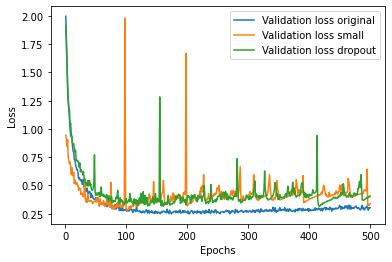

In [119]:
# plotting the validation loss for each of the models
loss = history.history['val_loss']
loss_small = history_small.history['val_loss']
loss_dropout = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Validation loss original')
plt.plot(epochs, loss_small, '-', label='Validation loss small')
plt.plot(epochs, loss_dropout, '-', label='Validation loss dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

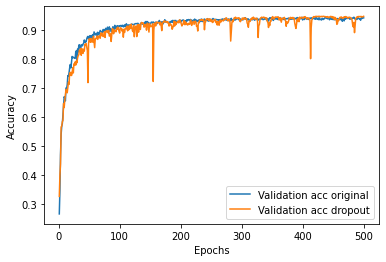

In [109]:
# plotting the validation accuracy for each of the models
acc = history.history['val_accuracy']
acc_dropout = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, '-', label='Validation acc original')
plt.plot(epochs, acc_dropout, '-', label='Validation acc dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [110]:
# evaluate model on the test data
model_dropout.evaluate(X_test, one_hot_test_labels)

372/372 [==============================] - 1s 3ms/step - loss: 0.3914 - accuracy: 0.9521


[0.39142942428588867, 0.952104389667511]

In [102]:
model.evaluate(X_test, one_hot_test_labels)

372/372 [==============================] - 1s 3ms/step - loss: 0.2882 - accuracy: 0.9406


[0.28822749853134155, 0.9405723810195923]

In [120]:
model_small.evaluate(X_test, one_hot_test_labels)

372/372 [==============================] - 1s 2ms/step - loss: 0.3064 - accuracy: 0.9529


[0.3064301311969757, 0.9528619647026062]

In [123]:
test_features = test_data[['peak_1', 'peak_2', 'peak_3', 'peak_4', 'peak_5', 'peak_6']]
test_labels = test_data["codes"]

In [124]:
one_hot_test_labels = to_categorical(test_labels)

In [125]:
# evaluate model on the mesured xrd peaks
model_small.evaluate(test_features, one_hot_test_labels)

62/62 [==============================] - 0s 3ms/step - loss: 39.2999 - accuracy: 0.0933


[39.29989242553711, 0.09329298883676529]